In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Logistic Regression

## Regression example

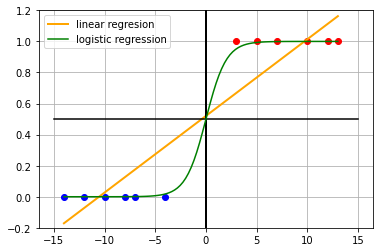

In [7]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

x = [-14,-12, -10, -8, -7, -4]
x1 = [ 3, 5, 7, 10, 12, 13]
x3 = np.linspace(-14, 13, 100)

y = [0]*len(x)
y1 = [1]*len(x1)
y2 = 1 / (1 + np.exp(-1 * x3))
regline = np.polyfit(x+x1,y+y1,1)

plt.plot(x,y, 'bo', x1,y1,'ro')
plt.plot(x+x1, [regline[0]*i + regline[1] for i in x+x1], color='orange', linewidth=2, label='linear regresion')
plt.plot([0,0],[1.2,-0.2], 'k-', linewidth=2)
plt.plot([-15,15],[0.5,0.5], 'k-')
plt.plot(x3, y2, color='green', label='logistic regression')

plt.ylim(-0.2, 1.2)
plt.grid()
plt.legend()

# Support Vector Machines

In [8]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets

In [9]:
wine = datasets.load_wine()
X = wine.data
y = wine.target

In [10]:
X[:10, :]

array([[1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
        3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, 1.120e+01, 1.000e+02, 2.650e+00,
        2.760e+00, 2.600e-01, 1.280e+00, 4.380e+00, 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, 1.860e+01, 1.010e+02, 2.800e+00,
        3.240e+00, 3.000e-01, 2.810e+00, 5.680e+00, 1.030e+00, 3.170e+00,
        1.185e+03],
       [1.437e+01, 1.950e+00, 2.500e+00, 1.680e+01, 1.130e+02, 3.850e+00,
        3.490e+00, 2.400e-01, 2.180e+00, 7.800e+00, 8.600e-01, 3.450e+00,
        1.480e+03],
       [1.324e+01, 2.590e+00, 2.870e+00, 2.100e+01, 1.180e+02, 2.800e+00,
        2.690e+00, 3.900e-01, 1.820e+00, 4.320e+00, 1.040e+00, 2.930e+00,
        7.350e+02],
       [1.420e+01, 1.760e+00, 2.450e+00, 1.520e+01, 1.120e+02, 3.270e+00,
        3.390e+00, 3.400e-01, 1.970e+00, 6.750e+00, 1.050e+00, 2.850e+00,
        1.45

In [11]:
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix

scalar = StandardScaler()
scalar.fit(X_train)
X_transform = scalar.transform(X_train)

# classifiers are commonly abbreviated as clf
clf = svm.SVC()
clf.fit(X_transform, y_train)
clf.score(scalar.transform(X_test), y_test)

0.9814814814814815

In [14]:
y_pred = clf.predict(scalar.transform(X_test))

confusion_matrix(y_test, y_pred)

array([[19,  0,  0],
       [ 0, 21,  0],
       [ 0,  1, 13]], dtype=int64)

In [15]:
# or with pipeline
pipeline = make_pipeline(StandardScaler(), svm.SVC())
pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

0.9814814814814815

# Decision Trees

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
pipeline = make_pipeline(StandardScaler(), DecisionTreeClassifier(max_depth=3))
pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

0.9629629629629629

In [33]:
y_pred = pipeline.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[18,  1,  0],
       [ 0, 21,  0],
       [ 0,  1, 13]], dtype=int64)

[Text(0.5, 0.875, 'X[9] <= -0.53\ngini = 0.658\nsamples = 124\nvalue = [40, 50, 34]'),
 Text(0.3, 0.625, 'X[12] <= 0.899\ngini = 0.083\nsamples = 46\nvalue = [2, 44, 0]'),
 Text(0.2, 0.375, 'X[2] <= 2.597\ngini = 0.043\nsamples = 45\nvalue = [1, 44, 0]'),
 Text(0.1, 0.125, 'gini = 0.0\nsamples = 44\nvalue = [0, 44, 0]'),
 Text(0.3, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.4, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.7, 0.625, 'X[6] <= -0.603\ngini = 0.567\nsamples = 78\nvalue = [38, 6, 34]'),
 Text(0.6, 0.375, 'gini = 0.0\nsamples = 34\nvalue = [0, 0, 34]'),
 Text(0.8, 0.375, 'X[12] <= -0.042\ngini = 0.236\nsamples = 44\nvalue = [38, 6, 0]'),
 Text(0.7, 0.125, 'gini = 0.245\nsamples = 7\nvalue = [1, 6, 0]'),
 Text(0.9, 0.125, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]')]

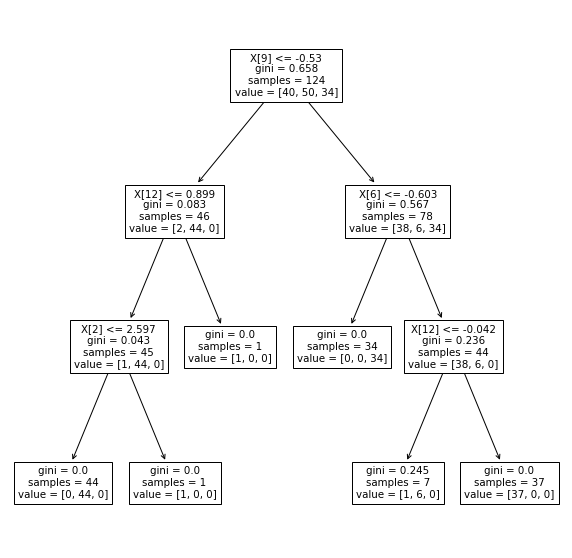

In [34]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
plot_tree(pipeline[1])

In [20]:
from sklearn.gaussian_process import GaussianProcessClassifier

pipeline = make_pipeline(StandardScaler(), GaussianProcessClassifier())
pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

0.9629629629629629

In [21]:
confusion_matrix(y_test, pipeline.predict(X_test))

array([[19,  0,  0],
       [ 1, 19,  1],
       [ 0,  0, 14]], dtype=int64)

# K-Nearest Neighbors

In [22]:
from sklearn.neighbors import KNeighborsClassifier

pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier())
pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

0.9629629629629629

In [23]:
confusion_matrix(y_test, pipeline.predict(X_test))

array([[19,  0,  0],
       [ 1, 19,  1],
       [ 0,  0, 14]], dtype=int64)

# Grid Search

*Note*: We're purposely doing this without scaling to force some error

Under normal circumstances

In [24]:
clf = svm.SVC()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7592592592592593

In [25]:
confusion_matrix(y_test, clf.predict(X_test))

array([[19,  0,  0],
       [ 0, 19,  2],
       [ 0, 11,  3]], dtype=int64)

In [26]:
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
clf = GridSearchCV(svm.SVC(), parameters)

In [27]:
clf.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

In [28]:
clf.score(X_test, y_test)

0.9814814814814815

In [29]:
confusion_matrix(y_test, clf.predict(X_test))

array([[19,  0,  0],
       [ 0, 20,  1],
       [ 0,  0, 14]], dtype=int64)

In [30]:
clf.best_estimator_

SVC(C=1, kernel='linear')

In [31]:
clf.best_params_

{'C': 1, 'kernel': 'linear'}